<a href="https://colab.research.google.com/github/Steve-YJ/Exp-Standalone-DeepLearning/blob/master/%5BAssingment1%5D%5Blinear_regression%5DPyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment1. MNIST Digit Recogntion

이 과제에서는 손으로 쓴 숫자들의 이미지를 input으로 받아서 0~9 중 어느 숫자에 해당하는지를 분류하는 10-way Classification Problem을 풀어 볼 겁니다. 지금까지 실습은 가상의 인공 데이터셋이었다면 이번에는 real-world 데이터셋이니 좀 더 설레지 않나요?

`pytorch` 내에 이미 구현되어 있는 MNIST Dataset을 사용하여 데이터가 공급됩니다.  
대신 여러분들은 Model을 짜고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해주시길 바랍니다.  

1. 현재 Linear Model만 구현이 되어 있습니다. MLP Model을 2.Model Architecture 부분에 구현해주세요.
2. MLP Model을 생성할 때 hidden unit 수와 hidden layer 수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보세요.  
3. 다양한 hidden_unit과 hidden_layer 그리고 learning rate를 바꿔가면서 정확도의 변화를 알려주세요(이 때 모델이 고정되었다면 learning rate부터 바꿔가면서 튜닝해보세요. 차트나 표를 자유롭게 활용하여 결과를 보여주세요.  
4. 실험했던 결과 중 Test Set에 대한 Accuracy가 가장 높았던 실험 조건과 그때의 Accuracy를 알려주세요!  
5. 양식은 따로 없으며 이 주피터 노트북의 뒷부분에 추가로 1~4의 내용을 덧붙여서 정리하면 되겠습니다!

**과제 시 도저히 해결할 수 없는 애러나 질문 사항은 제 깃허브의 [Issue](https://github.com/heartcored98/Standalone-DeepLearning/issues)란에 새 이슈를 남겨주세요**

**Due** : 2019-01-23 22:00  
**How to Submit** : 여러분의 깃허브 저장소를 만드신 후 작업한 .ipynb 파일을 올려주신 후 파일의 url 주소를 강의 피드백 설문 중 과제 제출 섹션에 남겨주세요! 그럼 저희가 파일을 하나하나 다운받고 열람할 필요 없이 온라인 상에서 바로 확인하기에 용이합니다 :)


**이 문서를 구글 Colab에서 쉽게 실행해보는법**  
1. [제가 미리 만들어놓은 이 링크](https://colab.research.google.com/github/heartcored98/Standalone-DeepLearning/blob/master/Lec2/Assignment1_pytorch_MNIST_MLP.ipynb)를 눌러 본 .ipynb 파일을 구글 Colab에서 바로 열 수 있습니다. 이때 구글에 로그인을 해야 합니다.
2. 아무 셀이나 선택한 후 `Ctrl+Enter`를 눌러 실행해보면 **[경고: 이 노트는 Google에서 작성하지 않았습니다]**라고 뜨는데 `실행 전에 모든 런타임 재설정`을 선택한 채로 `무시하고 계속하기`를 눌러줍니다.  
3. **[모든 런타임 재설정]** 이 뜰 텐데 `예`를 눌러줍니다.  
4. 잠시 구글 서버의 배치가 되면서 우상단에 `연결중` -> `초기화중` -> `연결됨`이 뜨면서 실행이 가능한 상태가 됩니다.  

**구글 Colab에서 실습후 저장하는법**  
**쉽게 실행보는법**을 따라오셨다면 Colab에서 임시 노트북으로 열리기 때문에 `파일`->`드라이브로 저장`을 눌러서 여러분의 구글 드라이브에 저장하거나 `파일` -> `.ipynb 다운로드`를 눌러서 다운로드 해줍시다.   

*Written by. 조재영(whwodud9@kaist.ac.kr) 2019.01.21 *

* to-do list
    * <code>pytorch</code>내에 구현되어 있는 MNIST 데이터셋을 활용한 분류문제
    * Model을 생성하고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해보자...!
    * MLPModel 생성시 hideen unit수와 hidden layer수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보자
    * 다양한 hidden_unit과 hidden layer 그리고 learning rate를 바꿔가면서 정확한 변화를 계산해보자
    * 가장 높은 Accuracy를 구해볼 것
    * 1st Trial: From. 20.09.03.Thur.am8:00 ~

### Install Pytorch 1.0 (For Google Colab)

In [1]:
"""#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요!
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)
"""

'#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요!\n!pip install -q torch==1.0.0 torchvision\nimport torch\nprint(torch.__version__)\n'

In [1]:
import torch

print(torch.cuda.is_available())

True


### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

* train: train_X: (50000, 784), train_y: (50000)
* val:   val_x: (10000, 784), val_y: (10000)
* test:  test_x: (10000, 784), test_y: (10000)

In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn

batch_size = 128  # set, batch_size
train_dataset = datasets.MNIST('./data', train=True, download=True,
                               transform = transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))                              
                               ]))
test_dataset = datasets.MNIST('./data', train=False, download=True,
                                transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
50000 10000 10000


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Inspecting Dataset

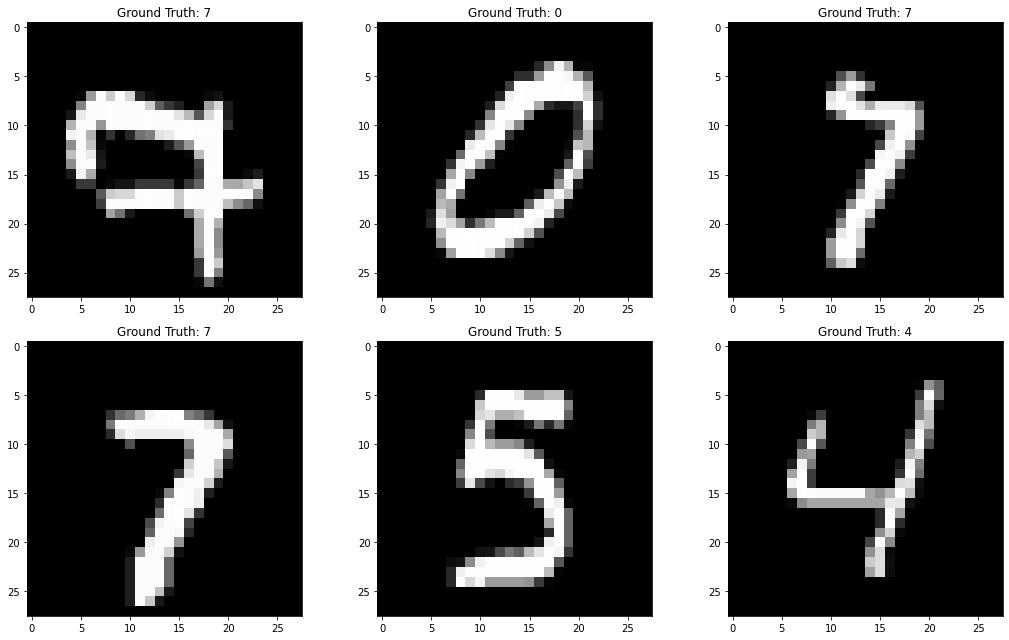

In [3]:
# Inspecting Dataset
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

### 2. Model Architecture

In [4]:
class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=784, out_features=10, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

'''
Model을 생성하고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해보자...!!!
MLPModel 생성시 hidden unit수와 hidden layer수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보자
다양한 hidden_unit과 hidden layer 그리고 learning rate를 바꿔가면서 정확한 변화를 계산해보자
'''


class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=28*28, out_features=2000, bias=True)
        self.linear2 = nn.Linear(in_features=2000, out_features=1000, bias=True)
        self.linear3 = nn.Linear(in_features=1000, out_features=200, bias=True)
        self.linear4 = nn.Linear(in_features=200, out_features=10, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.relu(x)
        return x


### 3. Cost Function Define (Loss Function Define)  

In [5]:
cls_loss = nn.CrossEntropyLoss()

### 4. Train & Evaluation

In [6]:
print(torch.cuda.is_available())

True


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import time
""""
cpu vs gpu 비교

devide를 정의해보자...! [#12 Lab] Run Pytorch on GPU
"""

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)
# ====== Construct Model ====== #
model = LinearModel()
model.to(device)
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr)
# optimizer.to(device)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    ts = time.time()  # Epoch이 시작되는 부분에 ts
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    optimizer.zero_grad()
    
    for input_X, true_y in train_loader:
        ## Check-point ##
        # print(input_X.shape)
        input_X = input_X.squeeze()
        # print(input_X.shape)
        input_X = input_X.view(-1, 784)
        input_X = input_X.to(device)
        # print(input_X.shape)
        true_y = true_y.to(device)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze().to(device)
        input_X = input_X.view(-1, 784)
        input_X = input_X.to(device)
        true_y = true_y.to(device)
        pred_y = model(input_X)
        

        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.item()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()  # [batch_num, 1, 28, 28] to [batch_num, 28, 28]
        input_X = input_X.view(-1, 784)
        input_X = input_X.to(device)
        true_y = true_y.to(device)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()

    acc = correct.item() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)
    
    te = time.time()
    # print(te-ts)

    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%, {:3.3f}'.format(i, train_loss, val_loss, acc*100, te-ts))

cuda:0
Number of 7850 parameters
Epoch: 0, Train Loss: 1.5402312023407967, Val Loss: 2.153076443491103, Test Acc: 89.12%, 10.932
Epoch: 1, Train Loss: 1.7756688746116351, Val Loss: 1.824565987798232, Test Acc: 87.5%, 10.368
Epoch: 2, Train Loss: 1.4392644400944186, Val Loss: 1.570950591865974, Test Acc: 88.26%, 10.998
Epoch: 3, Train Loss: 1.3952323734912726, Val Loss: 1.7597670992718468, Test Acc: 87.06%, 10.870
Epoch: 4, Train Loss: 1.4075787858203854, Val Loss: 1.679916441817827, Test Acc: 88.24%, 10.793
Epoch: 5, Train Loss: 1.4084339245505955, Val Loss: 1.9736021945748148, Test Acc: 85.14%, 10.864
Epoch: 6, Train Loss: 1.5295028022640502, Val Loss: 1.9219471057759057, Test Acc: 88.06%, 10.819


### 5. Report Experiment  
학습 과정에서 기록했던 train_loss와 val_loss를 그려봅시다.   
Loss가 꾸준히 줄어드는지 확인하고 val_loss가 증가하기 시킨다면 그 이상의 학습은 점점 모델의 성능을 망침을 뜻합니다. 
그 옆에는 Epoch에 따라서 MAE metric이 얼마나 감소하는지 확인해봅시다.

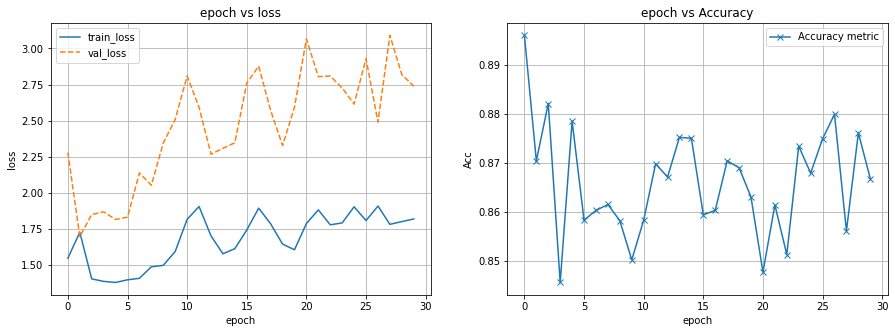

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

# Assignment Test
* myself-MLPModel Test!


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #
model = MLPModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    optimizer.zero_grad() 
    
    for input_X, true_y in train_loader:
        ## Check-point ##
        # print(input_X.shape)
        input_X = input_X.squeeze()
        # print(input_X.shape)
        input_X = input_X.view(-1, 784)
        # print(input_X.shape)
        pred_y = model(input_X)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()  # [batch_num, 1, 28, 28] to [batch_num, 28, 28]
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()

    acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))

Number of 3773210 parameters
Epoch: 0, Train Loss: 1.523658875614176, Val Loss: 1.3892383183105081, Test Acc: 59.88%
Epoch: 1, Train Loss: 1.163133372431216, Val Loss: 1.0705229021325897, Test Acc: 72.43%
Epoch: 2, Train Loss: 0.9059326834690845, Val Loss: 0.7054339405856555, Test Acc: 84.34%
Epoch: 3, Train Loss: 0.5295618918850599, Val Loss: 0.5615605810020543, Test Acc: 91.5%
Epoch: 4, Train Loss: 0.46920419779732403, Val Loss: 0.5548017945470689, Test Acc: 93.34%
Epoch: 5, Train Loss: 0.43877110898952043, Val Loss: 0.49971737024150314, Test Acc: 93.46%
Epoch: 6, Train Loss: 0.41151479096211435, Val Loss: 0.48696688666373866, Test Acc: 94.54%
Epoch: 7, Train Loss: 0.39563510500256666, Val Loss: 0.462433778786961, Test Acc: 94.03%
Epoch: 8, Train Loss: 0.3761031140223184, Val Loss: 0.4439917250147349, Test Acc: 94.89%
Epoch: 9, Train Loss: 0.36907989918575873, Val Loss: 0.45673206957835183, Test Acc: 94.89%
Epoch: 10, Train Loss: 0.35830905694333487, Val Loss: 0.4641657862104947, Tes

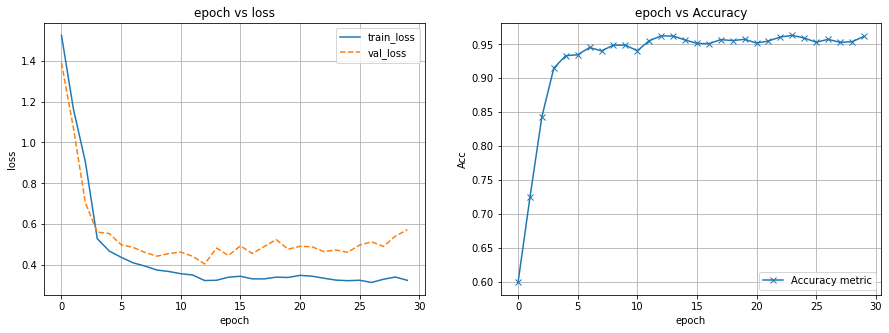

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

=> Train Loss는 줄어드는데 Validation Loss는 어느순간부터 줄어들지 않는다...!

## Change Optim
* Change Optimizer
    * SGD to Adam
    * Change learning rate?

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #
model = MLPModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.Adam(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    optimizer.zero_grad() 
    
    for input_X, true_y in train_loader:
        ## Check-point ##
        # print(input_X.shape)
        input_X = input_X.squeeze()
        # print(input_X.shape)
        input_X = input_X.view(-1, 784)
        # print(input_X.shape)
        pred_y = model(input_X)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()  # [batch_num, 1, 28, 28] to [batch_num, 28, 28]
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()

    acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))


Number of 3773210 parameters
Epoch: 0, Train Loss: 2.313962299805468, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 1, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 2, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 3, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 4, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 5, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 6, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 7, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 8, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 9, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 10, Train Loss: 2.302582742003224, Val Loss: 2.3025827739812152, Test Acc: 9.8%
Epoch: 11, Train Loss: 

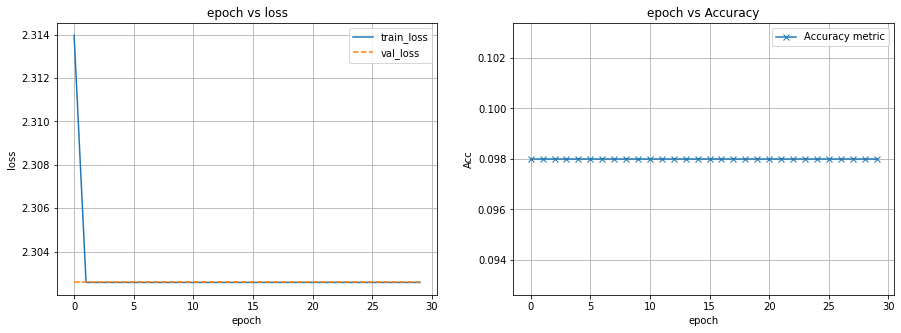

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

* About Train, Val and Test Dataset: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

# Assignment #1 Review

## How was Assignment #1 ?

* 1. MLP hidden layer수가 바뀔 때마다 매번 코드에 직접 쳐야 함(불편)
* 2. 실험 돌리는거 오래 걸려요(현기증 남)
* 3. 같은 코드인데도 돌릴 때 마다 결과가 달라요
* 4. Train Loss는 줄어드는데 Validation Loss는 안 줄어들어요
* 5. 변수들을 어떤 식으로 어떻게 바꿔야 할 지 모르겠어요
* 6. 그리고 아직도 Train/Validation/Test어떻게 써야하는지 모르겠어요

In [ ]:
# Again, Assignment #1
# How to make ML hidden layer automatically?

'''
Model을 생성하고 올바르게 Loss Function을 활용하는 코드를 작성하는데 집중해보자...!!!
MLPModel 생성시 hidden unit수와 hidden layer수를 인풋으로 넣어주면 해당 값으로 MLP가 자동으로 생성되게 하는 코드를 구현해보자
다양한 hidden_unit과 hidden layer 그리고 learning rate를 바꿔가면서 정확한 변화를 계산해보자
'''


class MLPModel(nn.Module):
    def __init__(self, hidden_layer, hidden_unit)):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=28*28, out_features=2000, bias=True)
        self.linear2 = nn.Linear(in_features=2000, out_features=1000, bias=True)
        self.linear3 = nn.Linear(in_features=1000, out_features=200, bias=True)
        self.linear4 = nn.Linear(in_features=200, out_features=10, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.relu(x)
        return x


* Just think about class?!


In [ ]:
class MLPModel(nn.Module):
    def __init__(self, hidden_layers, hidden_units):
        self.num_layers = hidden_layers
        self.num_units = hidden_units
        
        self.linear1 = nn.Linear(in_features=28*28, out_features=self.num_units, bias=True)
        self.linear2 = nn.Linear(in_features=self.num_units, out_features=10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Iterate, num_layers
        for i in range(self.num_layers):
            x = self.linear1(x)
            x = self.linear2(x)
            x = self.relu(x)
        return x

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ====== Construct Model ====== #
model = MLPModel(5, 200)
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.Adam(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    optimizer.zero_grad() 
    
    for input_X, true_y in train_loader:
        ## Check-point ##
        # print(input_X.shape)
        input_X = input_X.squeeze()
        # print(input_X.shape)
        input_X = input_X.view(-1, 784)
        # print(input_X.shape)
        pred_y = model(input_X)
        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    optimizer.zero_grad()
    
    for input_X, true_y in val_loader:
        input_X = input_X.squeeze()
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        val_loss += loss.detach().numpy()
    val_loss = val_loss / len(val_loader)
    list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    optimizer.zero_grad()

    for input_X, true_y in test_loader:
        input_X = input_X.squeeze()  # [batch_num, 1, 28, 28] to [batch_num, 28, 28]
        input_X = input_X.view(-1, 784)
        pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
        correct += pred_y.eq(true_y).sum()

    acc = correct.numpy() / len(test_loader.dataset)
    list_acc.append(acc)
    list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))

AttributeError: ignored